In [2]:
pip install beautifulsoup4 requests pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:

from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen
import pandas as pd 
import requests

In [4]:
url = "https://store.playstation.com/en-sa/category/30e3fe35-8f2d-4496-95bc-844f56952e3c/1"

In [5]:
client =urlopen(url)

In [6]:
html= client.read( )

In [7]:
html

b'<!DOCTYPE html><html class="psw-root psw-rem-base" dir="ltr" lang="en-sa"><head><meta name="wca-ssr-version" content="3.7.0" /><meta name="wca-locale" content="en-SA" /><meta name="wca-theme" content="dark" /><script id="wca-config-overrides" type="application/json">\n    {"client":{"webCheckout":{"clientId":"2eb25762-877f-4140-b341-7c7e14c19f98"}}}</script>\n  <link rel="preconnect" href="https://static.playstation.com" crossorigin />\n    <link rel="dns-prefetch" href="https://static.playstation.com" />\n    <link rel="preconnect" href="https://web.np.playstation.com/api/graphql/v1" />\n    <link rel="dns-prefetch" href="https://web.np.playstation.com/api/graphql/v1" />\n    <link rel="preconnect" href="https://image.api.playstation.com" crossorigin />\n    <link rel="dns-prefetch" href="https://image.api.playstation.com" />\n    <link rel="dns-prefetch" href="https://id.sonyentertainmentnetwork.com" />\n    <link rel="dns-prefetch" href="https://checkout.playstation.com" />\n    \

In [8]:
client.close()

In [9]:
soup =bs(html,"html.parser")

In [10]:
soup

<!DOCTYPE html>
<html class="psw-root psw-rem-base" dir="ltr" lang="en-sa"><head><meta content="3.7.0" name="wca-ssr-version"/><meta content="en-SA" name="wca-locale"/><meta content="dark" name="wca-theme"/><script id="wca-config-overrides" type="application/json">
    {"client":{"webCheckout":{"clientId":"2eb25762-877f-4140-b341-7c7e14c19f98"}}}</script>
<link crossorigin="" href="https://static.playstation.com" rel="preconnect"/>
<link href="https://static.playstation.com" rel="dns-prefetch"/>
<link href="https://web.np.playstation.com/api/graphql/v1" rel="preconnect"/>
<link href="https://web.np.playstation.com/api/graphql/v1" rel="dns-prefetch"/>
<link crossorigin="" href="https://image.api.playstation.com" rel="preconnect"/>
<link href="https://image.api.playstation.com" rel="dns-prefetch"/>
<link href="https://id.sonyentertainmentnetwork.com" rel="dns-prefetch"/>
<link href="https://checkout.playstation.com" rel="dns-prefetch"/>
<link href="https://static.playstation.com/font-sta

In [11]:
container = soup.find_all("section", {"class": "psw-product-tile__details psw-m-t-2"})

In [12]:
container2 = soup.find_all("div", {"class": "psw-l-anchor-bottom-left psw-l-bottom-left psw-m-l-3 psw-m-sub-t-3"})

In [13]:
len(container2)

24

In [14]:
len(container)

24

In [15]:
bs.prettify(container[0])

'<section class="psw-product-tile__details psw-m-t-2" data-qa="ems-sdk-grid#productTile0#details">\n <span class="psw-t-body psw-c-t-1 psw-t-truncate-2 psw-m-b-2" data-qa="ems-sdk-grid#productTile0#product-name">\n  Gang Beasts\n </span>\n <div class="psw-m-t-3 psw-m-b-2 psw-badge psw-l-anchor psw-l-inline psw-r-1" data-qa="ems-sdk-grid#productTile0#discount-badge">\n  <span class="psw-body-2 psw-badge__text psw-badge--none psw-text-bold psw-p-y-0 psw-p-2 psw-r-1 psw-l-anchor" data-qa="ems-sdk-grid#productTile0#discount-badge#text">\n   -60%\n  </span>\n </div>\n <div class="psw-fill-x psw-price psw-l-inline psw-l-line-left-top" data-qa="ems-sdk-grid#productTile0#price">\n  <div class="psw-l-line-left-top psw-l-line-wrap psw-clip psw-t-h-body-1">\n   <span aria-hidden="true" class="psw-m-r-3" data-qa="ems-sdk-grid#productTile0#price#display-price">\n    $9.19\n   </span>\n   <span class="sr-only">\n   </span>\n   <s aria-hidden="true" class="psw-c-t-2" data-qa="ems-sdk-grid#productTile

In [16]:
Game =container[0].findAll("span",{"data-qa":"ems-sdk-grid#productTile0#product-name"})
Game[0].text

'Gang Beasts'

In [17]:
Price =container[0].findAll("span",{"data-qa":"ems-sdk-grid#productTile0#price#display-price"})
Price[0].text

'$9.19'

In [18]:
Console =container2[0].findAll("span",{"data-qa":"ems-sdk-grid#productTile0#game-art#tag0"})
Console[0].text

'PS4'

In [19]:
f=open("Playstation.csv","w")
header="Game, Price, Console\n"
f.write(header)

21

In [20]:
# Open the file with utf-8 encoding
with open('Playstation.csv', 'w', encoding='utf-8') as f:
    # Write the header
    f.write("Game, Price, Console\n")
    
    # Iterate through each page number
    for page_num in range(1, 71):
        url = f"https://store.playstation.com/en-sa/category/30e3fe35-8f2d-4496-95bc-844f56952e3c/{page_num}"
        
        # Fetch the webpage
        response = requests.get(url)
        soup = bs(response.content, 'html.parser')
        
        # Finding containers
        container = soup.find_all("section", {"class": "psw-product-tile__details psw-m-t-2"})
        container2 = soup.find_all("div", {"class": "psw-l-anchor-bottom-left psw-l-bottom-left psw-m-l-3 psw-m-sub-t-3"})
        
        # Iterating through containers
        for i in range(len(container)):
            # Extracting game name
            Game = container[i].findAll("span", {"data-qa": "ems-sdk-grid#productTile" + str(i) + "#product-name"})
            game_name = Game[0].text.strip() if Game else "Game not found"
            
            # Extracting price
            Price = container[i].findAll("span", {"data-qa": "ems-sdk-grid#productTile" + str(i) + "#price#display-price"})
            price = Price[0].text.strip() if Price else "Price not found"
            
            # Extracting console
            Console = container2[i].findAll("span", {"data-qa": "ems-sdk-grid#productTile" + str(i) + "#game-art#tag0"})
            console = Console[0].text.strip() if Console else "Console not found"
            
            # Writing to CSV
            f.write(f"{game_name.replace(',', ' ').replace('\u3000', ' ')}, {price.replace(',', ' ').replace('\u3000', ' ')}, {console.replace(',', ' ').replace('\u3000', ' ')}\n")


In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("Playstation.csv", encoding='ISO-8859-1')
print(df)

                                         Game    Price  Console
0                                 Gang Beasts    $9.19      PS4
1                             Resident Evil 4   $34.99      PS5
2     Crash Bandicootâ¢ 4: Itâs About Time   $19.79      PS5
3                                     HAJWALA   $10.19      PS4
4           Crashâ¢ Team Racing Nitro-Fueled   $13.99      PS4
...                                       ...      ...      ...
1675                         Arcade Game Zone   $22.79      PS4
1676          Arcade Paradise PS4â¢ & PS5â¢    $8.99      PS5
1677                           Arcadia Fallen    $8.99      PS5
1678              ArcaniA - The Complete Tale    $3.59      PS4
1679                           Arca's Path VR   $19.19      PS4

[1680 rows x 3 columns]


In [23]:
df.head()

,Game,Price,Console
0,Gang Beasts,$9.19,PS4
1,Resident Evil 4,$34.99,PS5
2,Crash Bandicootâ¢ 4: Itâs About Time,$19.79,PS5
3,HAJWALA,$10.19,PS4
4,Crashâ¢ Team Racing Nitro-Fueled,$13.99,PS4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Game      1680 non-null   object
 1    Price    1680 non-null   object
 2    Console  1680 non-null   object
dtypes: object(3)
memory usage: 39.5+ KB


In [26]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1675    False
1676    False
1677    False
1678    False
1679    False
Length: 1680, dtype: bool


In [ ]:
for i in df["Game"]:
    print(i)

Gang Beasts
Resident Evil 4
Crash Bandicootâ¢ 4: Itâs About Time
HAJWALA
Crashâ¢ Team Racing Nitro-Fueled
ELDEN RING PS4 & PS5
Crash Bandicootâ¢ N. Sane Trilogy
WWE 2K24
Pummel Party
Red Dead Redemption
resident evil 4 (2005)
Mount & Blade II: Bannerlord
God of War RagnarÃ¶k
The Crewâ¢ Motorfest Standard Edition - Cross-Gen Bundle
NARUTO X BORUTO Ultimate Ninja STORM CONNECTIONS PS4 & PS5
Wobbly Life
Grounded PS4Â® & PS5Â®
Cuphead
ARK: Survival Evolved
TABS
Sekiroâ¢: Shadows Die Twice - Game of the Year Edition
CarX Drift Racing Online
Red Dead Online
Cyberpunk 2077
Stray
Battlefieldâ¢ 1
Spyroâ¢ Reignited Trilogy
A Plague Tale: Innocence
Highway Drifter: Hajwala Simulator
DARK SOULSâ¢: REMASTERED
Far Cry 5
Abo Khashem
DARK SOULSâ¢ III
Resident Evil
Police Simulator: Patrol Officers
Resident Evil Village PS4 & PS5
RESIDENT EVIL 7 biohazard
TEKKEN 7
The Crewâ¢ Motorfest Standard Edition
Tomb Raider I-III Remastered Starring Lara Croft
Resident Evil 0
Lies of P
Unravel Two
Mou

In [ ]:
for i in df[" Price"]:
    print(i)

 $9.19
 $34.99
 $19.79
 $10.19
 $13.99
 $54.99
 $34.99
 $59.99
 $19.19
 $49.99
 $5.74
 $26.99
 $79.99
 $74.99
 $31.89
 $21.49
 $44.99
 $22.99
 $14.99
 $16.09
 $59.99
 $26.99
 $19.99
 $44.99
 $26.99
 $17.99
 $13.99
 $10.49
 $23.99
 $34.99
 $8.99
 $26.99
 $44.99
 $5.74
 $26.99
 $34.99
 $17.99
 $44.99
 $64.99
 $25.49
 $5.74
 $54.99
 $22.99
 $26.99
 $2.69
 $69.99
 $69.99
 $44.99
 $17.99
 $74.99
 $54.99
 $26.99
 $23.99
 $62.99
 $48.99
 $9.74
 $59.99
 $69.99
 $5.39
 $44.99
 $12.59
 $34.99
 $17.99
 $22.49
 $54.99
 $26.99
 $5.09
 $62.99
 $17.99
 $54.99
 $54.99
 $44.99
 $44.99
 $16.99
 $5.75
 $11.29
 $34.99
 $59.99
 $59.99
 $29.99
 $34.99
 $8.99
 $34.99
 $44.99
 $34.99
 $39.99
 $6.29
 $6.99
 $17.99
 $4.49
 $17.99
 $33.99
 $3.99
 $44.99
 $26.99
 $34.99
 $22.49
 $3.84
 $26.99
 $34.99
 $34.99
 $34.99
 $67.99
 $44.99
 $17.49
 $17.99
 $49.99
 $11.24
 $62.99
 $62.99
 $62.99
 $62.99
 $62.99
 $44.99
 $69.99
 $59.99
 $59.99
 $14.94
 $5.58
 $26.99
 $34.99
 $8.99
 $22.49
 $56.99
 $56.99
 $56.99
 $18.69
 $

## Replace free with 0$

In [ ]:
df[' Price'] = df[' Price'].replace('free', '$0')

## Replace Unavailable, Game Trail and Included with NULL

In [ ]:
df[' Price'] = df[' Price'].replace(['unavailable', 'game trail', 'included'], np.nan)

In [ ]:
df[' Price'] = pd.to_numeric(df[' Price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

In [ ]:
for i in df[" Price"]:
    print(i)

9.19
34.99
19.79
10.19
13.99
54.99
34.99
59.99
19.19
49.99
5.74
26.99
79.99
74.99
31.89
21.49
44.99
22.99
14.99
16.09
59.99
26.99
19.99
44.99
26.99
17.99
13.99
10.49
23.99
34.99
8.99
26.99
44.99
5.74
26.99
34.99
17.99
44.99
64.99
25.49
5.74
54.99
22.99
26.99
2.69
69.99
69.99
44.99
17.99
74.99
54.99
26.99
23.99
62.99
48.99
9.74
59.99
69.99
5.39
44.99
12.59
34.99
17.99
22.49
54.99
26.99
5.09
62.99
17.99
54.99
54.99
44.99
44.99
16.99
5.75
11.29
34.99
59.99
59.99
29.99
34.99
8.99
34.99
44.99
34.99
39.99
6.29
6.99
17.99
4.49
17.99
33.99
3.99
44.99
26.99
34.99
22.49
3.84
26.99
34.99
34.99
34.99
67.99
44.99
17.49
17.99
49.99
11.24
62.99
62.99
62.99
62.99
62.99
44.99
69.99
59.99
59.99
14.94
5.58
26.99
34.99
8.99
22.49
56.99
56.99
56.99
18.69
5.99
54.99
54.99
54.99
4.19
67.99
13.49
18.08
17.99
62.99
34.99
34.99
34.99
34.99
10.79
26.99
22.99
5.39
33.99
20.39
6.74
62.99
26.99
69.99
49.99
26.99
17.99
39.99
49.99
11.26
34.99
22.99
22.99
39.99
13.43
44.99
44.99
44.99
44.99
44.99
44.99
44.99
44.99
44

In [ ]:
print(df['Game'].unique())


['Gang Beasts' 'Resident Evil 4'
 'Crash Bandicootâ\x84¢ 4: Itâ\x80\x99s About Time' ... 'Arcadia Fallen'
 'ArcaniA - The Complete Tale' "Arca's Path VR"]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Game      1680 non-null   object 
 1    Price    1668 non-null   float64
 2    Console  1680 non-null   object 
dtypes: float64(1), object(2)
memory usage: 39.5+ KB


In [ ]:
df.dropna(inplace=True)
df

,Game,Price,Console
0,Gang Beasts,9.19,PS4
1,Resident Evil 4,34.99,PS5
2,Crash Bandicootâ¢ 4: Itâs About Time,19.79,PS5
3,HAJWALA,10.19,PS4
4,Crashâ¢ Team Racing Nitro-Fueled,13.99,PS4
...,...,...,...
1675,Arcade Game Zone,22.79,PS4
1676,Arcade Paradise PS4â¢ & PS5â¢,8.99,PS5
1677,Arcadia Fallen,8.99,PS5
1678,ArcaniA - The Complete Tale,3.59,PS4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 1679
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Game      1668 non-null   object 
 1    Price    1668 non-null   float64
 2    Console  1668 non-null   object 
dtypes: float64(1), object(2)
memory usage: 52.1+ KB


## Questions

## Q1. Which Game has the highest Price?

In [ ]:
highest_price = df[' Price'].max()
df[df[' Price'] == highest_price]

,Game,Price,Console
12,God of War RagnarÃ¶k,79.99,PS5


## Q2. What is the average price of Games?

In [ ]:
avg_price_high_rating = df[' Price'].mean()
print(f"Average price of Games in this dataset are: {avg_price_high_rating}")


Average price of Games in this dataset are: 16.46925659472422


## Q3. Which Game has the lowest Price ?

In [ ]:
lowest_price = df[' Price'].min()
df[df[' Price'] == lowest_price]


,Game,Price,Console
1106,Hoodie Survivor,0.14,PS4
1118,Spectrewoods,0.14,PS4


## Q4. Mean , median and max 

In [ ]:
df.describe()

,Price
count,1668.000000
mean,16.469257
std,14.861678
min,0.140000
25%,7.722500
50%,10.790000
75%,22.990000
max,79.990000


## Q5. How many games have sequels ?

In [ ]:
# Game names
df['Game Name'] = df['Game'].apply(lambda x: ' '.join(x.split()[:-1]))

# shelna "The" 3shan by7sebha
df = df[df['Game Name'] != 'The']

# 3adad el sequels
sequel_count = df['Game Name'].value_counts()

# filter
games_with_sequels = sequel_count[sequel_count > 1]

print("Number of games with sequels:")
print(games_with_sequels)

Number of games with sequels:
Game Name
                                          158
Arcade Archives                            71
ACA NEOGEO THE KING OF FIGHTERS            10
Animal                                      5
ACA NEOGEO METAL SLUG                       5
                                         ... 
Arcade Archives TIME                        2
NARUTO SHIPPUDEN: Ultimate Ninja STORM      2
Battlefieldâ¢                              2
Resident Evil                               2
Arcade Archives THE LEGEND OF               2
Name: count, Length: 83, dtype: int64


## Q6. Which console has the highest number of games ?

In [ ]:
console_counts = df[' Console'].value_counts()
console_most_games = console_counts.idxmax()
print(f"The console with the highest number of games is: {console_most_games}")

The console with the highest number of games is:  PS4


## Q7. Which console has the most expensive game ?

In [ ]:
max_price_by_console = df.groupby(' Console')[' Price'].max()
console_most_expensive_game = max_price_by_console.idxmax()
print(f"The console with the most expensive game is: {console_most_expensive_game}")


The console with the most expensive game is:  PS5


## Q8. What is the distribution of prices between games ?

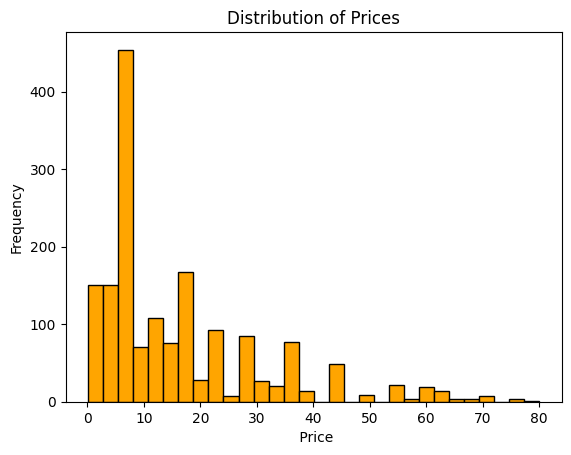

In [ ]:
import matplotlib.pyplot as plt

# Histogram of prices
plt.figure()
plt.hist(df[' Price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel(' Price')
plt.ylabel('Frequency')
plt.show()


## Q9. What are the top five most expensive games ?

In [ ]:
sorted_df = df.sort_values(by=' Price', ascending=False)
top_5_expensive_games = sorted_df.head(5)
print(top_5_expensive_games)


                                                  Game   Price  Console  \
12                                God of War RagnarÃ¶k   79.99      PS5   
627                         MLBÂ® The Showâ¢ 24 PS5Â®   76.99      PS5   
49   Call of DutyÂ®: Black Ops Cold War - Cross-Gen...   74.99      PS5   
13   The Crewâ¢ Motorfest Standard Edition - Cross...   74.99      PS5   
428                           Atomic Heart (PS4 & PS5)   71.99      PS5   

                                             Game Name  
12                                          God of War  
627                               MLBÂ® The Showâ¢ 24  
49   Call of DutyÂ®: Black Ops Cold War - Cross-Gen...  
13   The Crewâ¢ Motorfest Standard Edition - Cross...  
428                                Atomic Heart (PS4 &  
